In [1]:
import numpy as np, json
import matplotlib.pyplot as plt

from envs import ComplementaryPricingEnv
from utils import generate_graph, generate_curves, generate_user_ranges

In [2]:
def generate_curves_complementary(num_products, num_actions, graph_dict, 
                                  base_variation_leader, base_variation_followers, 
                                  min_start_leader, max_start_leader, 
                                  min_start_followers, max_start_followers):
    """
    Generates demand curves for complementary products. W.l.o.g., followers of the same leader presents the same demand.
    """

    L_leader = base_variation_leader / num_actions
    L_followers = base_variation_followers / num_actions
    demands = np.zeros((num_products, num_actions))

    for key in list(graph_dict.keys()):
    
        demands[key, 0] = np.random.uniform(min_start_leader, max_start_leader, 1)
        demands[key, 1:] = np.random.uniform(0, -L_leader, num_actions-1)

        if len(graph_dict[key]) > 0:

            demands[graph_dict[key][0], 0] = np.random.uniform(min_start_followers, max_start_followers, 1)
            demands[graph_dict[key][0], 1:] = np.random.uniform(0, -L_followers, num_actions-1)
            
            for i in range(1, len(graph_dict[key])):

                demands[graph_dict[key][i], :] = demands[graph_dict[key][0], :]
        
    demands = np.maximum(np.cumsum(demands, axis=1), 0)

    return demands

/var/folders/58/jk09dpw90wv_97d9nbc3mnn00000gn/T/ipykernel_5067/2897743440.py:15: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  demands[key, 0] = np.random.uniform(min_start_leader, max_start_leader, 1)
/var/folders/58/jk09dpw90wv_97d9nbc3mnn00000gn/T/ipykernel_5067/2897743440.py:20: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  demands[graph_dict[key][0], 0] = np.random.uniform(min_start_followers, max_start_followers, 1)
/var/folders/58/jk09dpw90wv_97d9nbc3mnn00000gn/T/ipykernel_5067/2897743440.py:15: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single



Iteration 1
{2: [0, 1]}


Iteration 2
{0: [1, 2]}


Iteration 3
{2: [0, 1]}


Iteration 4
{1: [0, 2]}


Iteration 5
{1: [0, 2]}


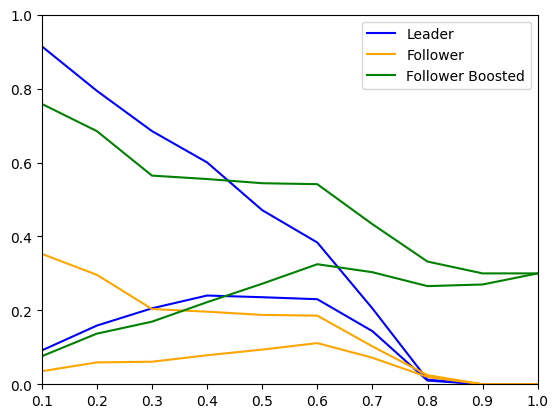

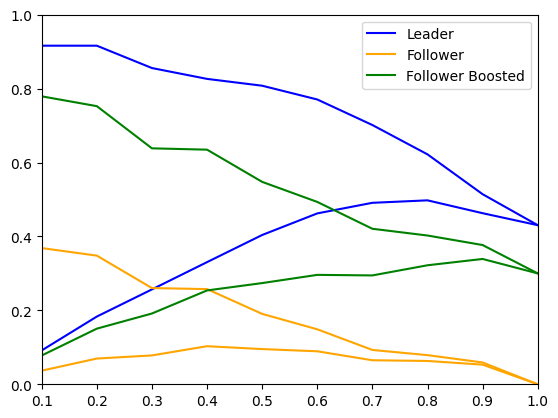

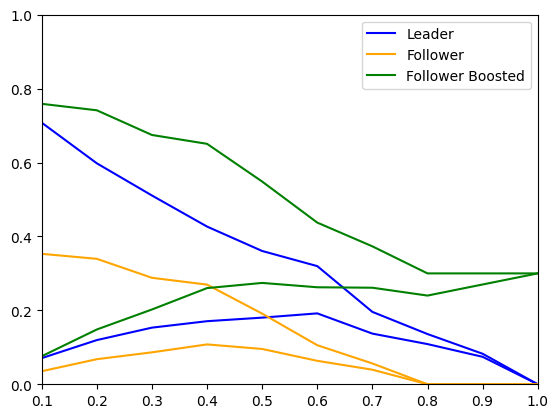

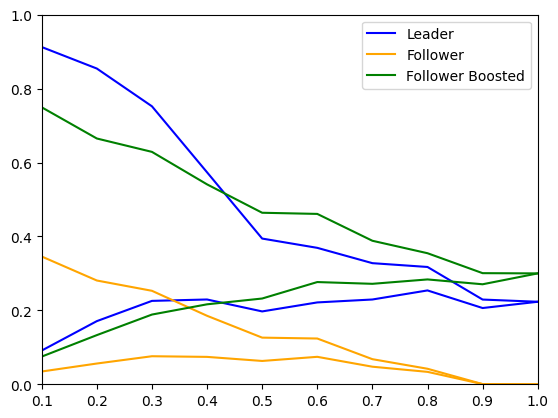

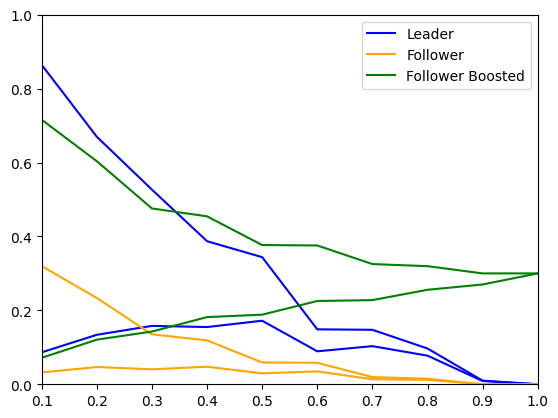

In [3]:
num_actions = 10
num_products = 3
num_clusters = 1
min_users = 20
max_users = 23
compl_factor_add = 0.000001
compl_factor_add = 0.3
compl_factor_molt = 1.000001 
compl_factor_molt = 1.3
min_start_leader = 0.7
max_start_leader = 1.0
min_start_followers = 0.3
max_start_followers = 0.4
base_variation_leader = 2
base_variation_followers = 1
actions = np.linspace(0.1, 1.0, num_actions)
costs = np.random.uniform(1, 2, num_products)
mc_ep = 1000

for iteration in range(5):

    np.random.seed(iteration)
    
    graph_dict = generate_graph(num_products, num_clusters)
    
    demands = generate_curves_complementary(num_products, num_actions, graph_dict, base_variation_leader, base_variation_followers, 
                                  min_start_leader, max_start_leader, min_start_followers, max_start_followers)
    
    user_ranges = generate_user_ranges(num_products, min_users, max_users)
    
    env = ComplementaryPricingEnv(num_products, num_actions, actions, demands, costs, user_ranges, 
                                  graph_dict, compl_factor_add, compl_factor_molt, mc_ep, 0)
    
    print(f"\n\nIteration {iteration+1}")
    print(graph_dict)
    
    for key in list(graph_dict.keys()):
        plt.figure()
        plt.plot(actions, demands[key, :] * actions, label="Leader", c="blue")
        plt.plot(actions, demands[key, :], c="blue")
        if len(graph_dict[key]) > 0:
            plt.plot(actions, demands[graph_dict[key][0], :] * actions, label="Follower", c="orange")
            plt.plot(actions, demands[graph_dict[key][0], :], c="orange")
            plt.plot(actions, (demands[graph_dict[key][0], :] * compl_factor_molt + compl_factor_add) * actions, label="Follower Boosted", c="green")
            plt.plot(actions, demands[graph_dict[key][0], :] * compl_factor_molt + compl_factor_add, c="green")
        plt.xlim([min(actions), max(actions)])
        plt.ylim([0, 1])
        plt.legend()
    
    # optimal_actions, optimal_value = env.compute_optimum()
    # optimal_actions_indep, optimal_value_indep = env.compute_optimum_indep()
    
    # print(f"Round {iteration+1}:\n\tJoint Actions: optimal_act: {optimal_actions}, value: {optimal_value}\n\tIndep Actions: optimal_act: {optimal_actions_indep}, value: {optimal_value_indep}\n")